In [1]:
import os
import glob

import numpy as np
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
df = pd.read_csv('full_results.csv')
name_nicely = {
    "banknote": "Banknote",
    "breastcancer": "BrCancer",
    "cifar10": "CIFAR-10",
    "htru2": "HTRU2",
    "mnist": "MNIST",
    "dnn": "DNN",
    "resnet": "ResNet",
    "svm": "SVM",
    "tree": "Tree",
    "vgg": "VGG",
    "baard": "BAARD",
    "fs": "FS",
    "lid": "LID",
    "magnet": "MagNet",
    "rc": "RC"
}
df['defence'] = df['defence'].map(name_nicely)
df['data'] = df['data'].map(name_nicely)
df['model'] = df['model'].map(name_nicely)

In [3]:
df1 = df.groupby(['data', 'model', 'attack', 'adv_param', 'defence'], as_index=False).agg({
        'acc_on_adv': ['mean'],
        'fpr': ['mean']
})
df1.columns = [x[0] for x in df1.columns]

In [4]:
df1.head()

,data,model,attack,adv_param,defence,acc_on_adv,fpr
0,Banknote,DNN,apgd,0.05,BAARD,0.923216,0.009091
1,Banknote,DNN,apgd,0.05,LID,0.834396,0.047516
2,Banknote,DNN,apgd,0.05,MagNet,0.658426,0.003030
3,Banknote,DNN,apgd,0.05,RC,0.735445,0.005066
4,Banknote,DNN,apgd,0.10,BAARD,0.660400,0.009091


## Group by attacks

In [5]:
# attacks = df['attack'].unique()
# ['apgd', 'apgd2', 'cw2', 'fgsm', 'bim', 'boundary', 'tree', 'deepfool', 'line']
# L-inf: apgd, fgsm, bim
# L-2: apgd2, cw2, boundary, deepfool
attacks = ['apgd', 'apgd2', 'cw2', 'fgsm']

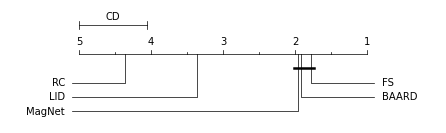

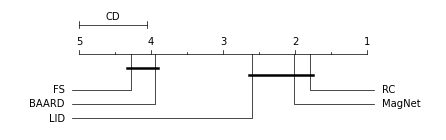

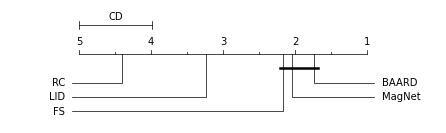

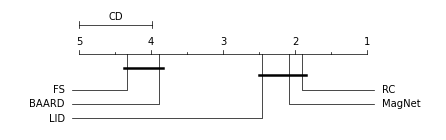

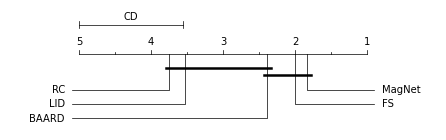

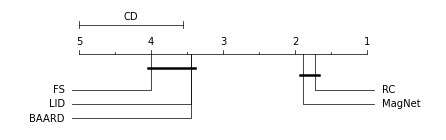

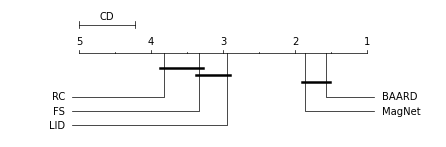

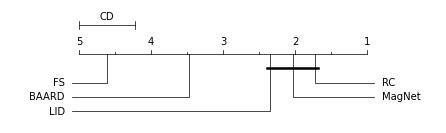

In [6]:
for att in attacks:
    data = df1[df1['attack'] == att]
    acc = pd.concat(
        {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
        axis=1
    )
    res_acc = autorank(acc)
    plot_stats(res_acc)
    plt.savefig('nemenyi_acc_{}.pdf'.format(att), format='pdf', dpi=1200, bbox_inches='tight')

    fpr = pd.concat(
        {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['fpr']},
        axis=1
    )
    res_fpr = autorank(fpr, order='ascending')
    plot_stats(res_fpr)
    plt.savefig('nemenyi_fpr_{}.pdf'.format(att), format='pdf', dpi=1200, bbox_inches='tight')

In [7]:
df2 = df.groupby(['data', 'model', 'attack', 'defence'], as_index=False).agg({
        'acc_on_adv': ['mean'],
        'fpr': ['mean']
})
df2.columns = [x[0] for x in df2.columns]
df2.head()

,data,model,attack,defence,acc_on_adv,fpr
0,Banknote,DNN,apgd,BAARD,0.934750,0.009091
1,Banknote,DNN,apgd,LID,0.831114,0.016031
2,Banknote,DNN,apgd,MagNet,0.783539,0.003030
3,Banknote,DNN,apgd,RC,0.133211,0.005066
4,Banknote,DNN,apgd2,BAARD,1.000000,0.009091


In [8]:
df2.shape

(183, 6)

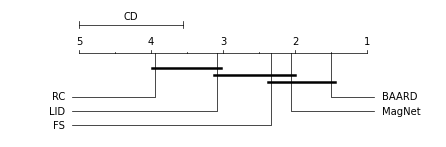

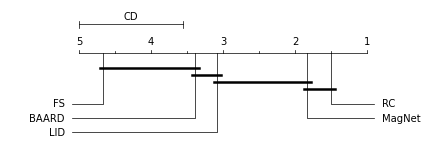

In [9]:
# L-inf: apgd, fgsm, bim

data = df2[(df2['attack'] == 'apgd') | (df2['attack'] == 'bim') | (df2['attack'] == 'fgsm')]
acc = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
    axis=1
)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_linf.pdf', format='pdf', dpi=1200, bbox_inches='tight')

fpr = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['fpr']},
    axis=1
)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_linf.pdf', format='pdf', dpi=1200, bbox_inches='tight')

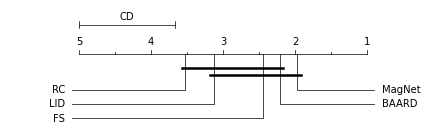

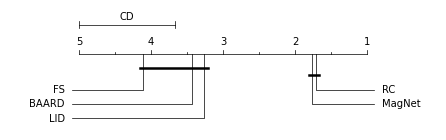

In [10]:
# L-2: apgd2, cw2, boundary, deepfool

data = df2[(df2['attack'] == 'apgd2') | (df2['attack'] == 'cw2') | (df2['attack'] == 'boundary')  | (df2['attack'] == 'deepfool')]
acc = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
    axis=1
)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_l2.pdf', format='pdf', dpi=1200, bbox_inches='tight')

fpr = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['fpr']},
    axis=1
)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_l2.pdf', format='pdf', dpi=1200, bbox_inches='tight')